# POLSCI 3 Fall 2021

## Week 11, Monday Section

For the first part of the section, we will be using data from last week.

In [3]:
life_gdp <- read.csv("./data/w10.csv")
head(life_gdp)

,cname,expectancy,gdp_per_capita
,<chr>,<dbl>,<dbl>
1,Afghanistan,63.377,1928
2,Albania,78.025,10032
3,Algeria,76.090,14004
4,Angola,59.398,8689
5,Argentina,76.068,19502
6,Armenia,74.467,10042


In [ ]:
# The linear relationship between the two variables looks like this:

`geom_smooth()` using formula 'y ~ x'



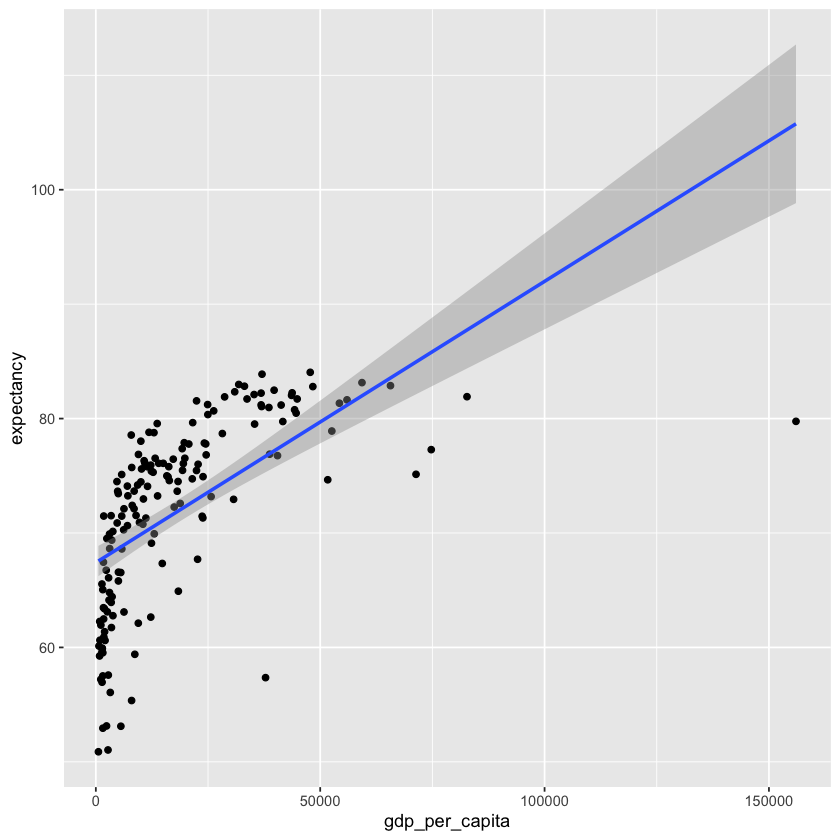

In [5]:
library(ggplot2)
qplot(gdp_per_capita, expectancy, data = life_gdp) + geom_smooth(method="lm")

### Quick check 1

Obtain the formula for the straight line above, by running a regression of `gdp_per_capita` against `expectancy`

In [6]:
summary(lm(expectancy ~ gdp_per_capita, data = life_gdp))


Call:
lm(formula = expectancy ~ gdp_per_capita, data = life_gdp)

Residuals:
    Min      1Q  Median      3Q     Max 
-26.003  -4.235   1.982   4.755   9.213 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)    6.741e+01  6.812e-01   98.95   <2e-16 ***
gdp_per_capita 2.458e-04  2.521e-05    9.75   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6.483 on 164 degrees of freedom
Multiple R-squared:  0.367,	Adjusted R-squared:  0.3631 
F-statistic: 95.07 on 1 and 164 DF,  p-value: < 2.2e-16


### Quick check 2

Write the formula of the line below.

**Solution:** $expectancy = 67.4 + 0.0002458 \times gdp\;per\;capita$

### Quick check 3

By hand, find the predicted life expectancy for a country with GDP per capita of US$20,000

**Solution:**

$67.4+0.0002458 \times 20000 = 72.316$

### Quick check 4

Can you use the regression results above to predict the life expectancy for a country with GDP per capita of US$300,000?

**Solution:** No, we would be extrapolating far beyond the domain of the regression.

For the second part of the section, we will be using the same campaign spending data from lecture.

In [2]:
library(ggplot2) # Allow us to make some graphs later

data <- read.csv("./data/ps3-house-election-spending.csv")
head(data)

,state,district,name_dem_cand,name_rep_cand,dem_us_house_percent_2020,dem_us_house_percent_2018,dem_won_ushouse_2018,clinton_percent_2016,spending_dem_ushouse_2020,spending_rep_ushouse_2020
,<chr>,<int>,<chr>,<chr>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
1,AL,1,"GARDNER, KIANI A","CARL, JERRY LEE, JR",35.53871,36.77648,0,34.93852,0.11866185,2.2325439
2,AL,2,"HARVEY-HALL, PHYLLIS","COLEMAN, JEFF",34.68272,38.42594,0,33.70786,0.05766116,2.6159773
3,AL,3,"WINFREY, ADIA","ROGERS, MICHAEL",32.45933,36.21845,0,33.09426,0.04122109,1.2283404
4,AL,4,"NEIGHBORS, RICKY","ADERHOLT, ROBERT B. REP.",17.68298,20.12911,0,17.79141,0.04790858,1.3521382
5,AL,5,"JOFFRION, PETER S.","BROOKS, MO",0.00000,38.89471,0,32.60417,0.00310696,0.2237067
6,AR,1,"CAUSEY, CHAD","CRAWFORD, ERIC ALAN RICK",0.00000,28.77438,0,31.72269,0.00060000,1.0955175


Here is a quick rundown of what each column means:

- `state`: State (e.g., for CA-13, "CA")
- `district`: District number (e.g., for CA-13, 13)
- `name_dem_cand`: Democrat candidate name in the 2020 US House elections
- `name_rep_cand`: Republican candidate name in the 2020 US House elections
- `dem_us_house_percent_2020`: Democrat candidate's vote share in 2020 election (percent)
- `dem_us_house_percent_2018`: Democrat candidate's vote share in 2018 election (percent)
- `dem_won_ushouse_2018`: A Democrat won the US House election in 2018, and so is running for re-election in 2020 (0 = lost, 1 = won)
- `clinton_percent_2016`: Clinton vote share in 2016 in the district (percent)
- `spending_dem_ushouse_2020`: Democratic US House candidate's spending in 2020, in millions of dollars 
- `spending_rep_ushouse_2020`: Republican US House candidate's spending in 2020, in millions of dollars 

### Does campaign spending work?

We'll use this data to see how multivariate regression can help us _try_ (not necessarily succeed) at reducing omitted variable bias when trying to understand the effects of campaign spending in US elections.

To make things easy, let's begin by subsetting the data to Democratic districts (where Democrats won the house election in 2018):

In [8]:
democrats <- subset(data, dem_won_ushouse_2018 == 1)

### Quick check 5

Controlling for how Democratic-leaning the district was in the 2016 Presidential election, _and_ how they performed in the last election, regress the Democratic vote share in 2020 against Democratic house spending in 2020

In [12]:
summary(lm(dem_us_house_percent_2020 ~ spending_dem_ushouse_2020 +
           clinton_percent_2016 + dem_us_house_percent_2018, democrats))


Call:
lm(formula = dem_us_house_percent_2020 ~ spending_dem_ushouse_2020 + 
    clinton_percent_2016 + dem_us_house_percent_2018, data = democrats)

Residuals:
    Min      1Q  Median      3Q     Max 
-31.997  -2.373   0.026   2.137  39.802 

Coefficients:
                          Estimate Std. Error t value Pr(>|t|)    
(Intercept)                6.15659    3.22338   1.910   0.0575 .  
spending_dem_ushouse_2020 -0.21580    0.18532  -1.164   0.2456    
clinton_percent_2016       0.78916    0.07449  10.594   <2e-16 ***
dem_us_house_percent_2018  0.10672    0.06561   1.627   0.1053    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 8.059 on 207 degrees of freedom
Multiple R-squared:  0.6707,	Adjusted R-squared:  0.6659 
F-statistic: 140.5 on 3 and 207 DF,  p-value: < 2.2e-16


### Quick check 6 

Interpret the estimate next to `spending_dem_ushouse_2020`

**Solution:** holding the presidential vote in 2016 and Democratic house vote in 2018 constant, each additional million dollars spent in the congressional race is correlated with -0.216% lower Democratic vote share in 2020.

### Quick check 7

Evaluate the following claim: 'including more control variables eliminates OVB'

**Solution:** False. Including the right control variables reduces the OVB, but we can never be sure that all of the relevant control variables are included.